In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
go = pd.read_csv('./go_topic_modeled.csv', index_col = 0)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentimentScore(x):
    return analyzer.polarity_scores(x)['compound']

go['Sentiment_Score'] = go['post_split'].astype('str').apply(sentimentScore)

go.drop(['fundraiser', 'post_split', 'post_split_tokenized', 'post_lemma', 'post_gensim', 'trial', 'trial_token', 'post'], axis=1, inplace=True)
go.head()

,update,title,image_labels,current_raised,goal_fund,Self-raised,goal_precentage,category,Sentiment_Score
0,NaN,Marley's Recovery,"['Nose', 'Cheek', 'Lip', 'Eyebrow', 'Eyelash',...",7620,5000,1,1.52,medical care,0.9295
1,NaN,Help myan get epidural stimulation surgery,[],900,215000,1,0.00,job loss,0.9914
2,NaN,Emergency Financial Aid to Support Salvatore,[],170761,200000,0,0.85,medical care,0.2732
3,NaN,360 Community Management- Help Eric's children,[],5585,5000,1,1.12,child loss,0.5267
4,NaN,Help Support Lynda VanderBilt,[],4100,4500,1,0.91,job loss,0.9922


In [3]:
go['include_image'] = go['image_labels'].apply(lambda x: 0 if x=='[]' else 1)
go.head()

,update,title,image_labels,current_raised,goal_fund,Self-raised,goal_precentage,category,Sentiment_Score,include_image
0,NaN,Marley's Recovery,"['Nose', 'Cheek', 'Lip', 'Eyebrow', 'Eyelash',...",7620,5000,1,1.52,medical care,0.9295,1
1,NaN,Help myan get epidural stimulation surgery,[],900,215000,1,0.00,job loss,0.9914,0
2,NaN,Emergency Financial Aid to Support Salvatore,[],170761,200000,0,0.85,medical care,0.2732,0
3,NaN,360 Community Management- Help Eric's children,[],5585,5000,1,1.12,child loss,0.5267,0
4,NaN,Help Support Lynda VanderBilt,[],4100,4500,1,0.91,job loss,0.9922,0


<AxesSubplot:xlabel='category'>

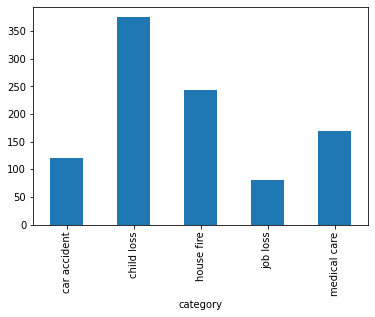

In [4]:
# Number of cases for each category
go.groupby('category')['goal_precentage'].agg('count').plot(kind='bar')

<AxesSubplot:xlabel='category'>

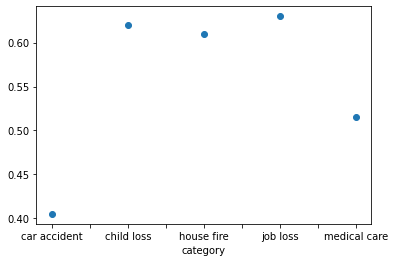

In [5]:
# Median goal percentage for each category
go.groupby('category')['goal_precentage'].agg(np.median).plot(linestyle='None', marker='o')

<AxesSubplot:xlabel='category'>

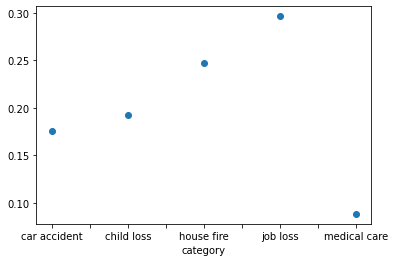

In [6]:
# Goal reach percentage for each category
go['goal_reached'] = go['goal_precentage'].apply(lambda x: 1 if x>=1 else 0)
(go.groupby('category')['goal_reached'].agg('sum')/go.groupby('category')['title'].agg('count')).plot(linestyle='None', marker = 'o')

<AxesSubplot:xlabel='category'>

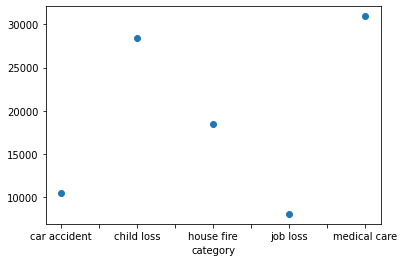

In [8]:
go.groupby('category')['current_raised'].agg(np.mean).plot(linestyle='None', marker='o')

In [26]:
# Create if there is update column
go['is_updated'] = go['update'].astype('str').apply(lambda x: 0 if x=='nan' else 1)
go.head()

,update,title,image_labels,current_raised,goal_fund,Self-raised,goal_precentage,category,Sentiment_Score,include_image,goal_reached,is_updated
0,NaN,Marley's Recovery,"['Nose', 'Cheek', 'Lip', 'Eyebrow', 'Eyelash',...",7620,5000,1,1.52,medical care,0.9295,1,1,0
1,NaN,Help myan get epidural stimulation surgery,[],900,215000,1,0.00,job loss,0.9914,0,0,0
2,NaN,Emergency Financial Aid to Support Salvatore,[],170761,200000,0,0.85,medical care,0.2732,0,0,0
3,NaN,360 Community Management- Help Eric's children,[],5585,5000,1,1.12,child loss,0.5267,0,1,0
4,NaN,Help Support Lynda VanderBilt,[],4100,4500,1,0.91,job loss,0.9922,0,0,0


In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

In [28]:
#get dummies
d1 = pd.get_dummies(go['category'])
go= go.join(d1)
go.head()

,update,title,image_labels,current_raised,goal_fund,Self-raised,goal_precentage,category,Sentiment_Score,include_image,goal_reached,is_updated,car accident,child loss,house fire,job loss,medical care
0,NaN,Marley's Recovery,"['Nose', 'Cheek', 'Lip', 'Eyebrow', 'Eyelash',...",7620,5000,1,1.52,medical care,0.9295,1,1,0,0,0,0,0,1
1,NaN,Help myan get epidural stimulation surgery,[],900,215000,1,0.00,job loss,0.9914,0,0,0,0,0,0,1,0
2,NaN,Emergency Financial Aid to Support Salvatore,[],170761,200000,0,0.85,medical care,0.2732,0,0,0,0,0,0,0,1
3,NaN,360 Community Management- Help Eric's children,[],5585,5000,1,1.12,child loss,0.5267,0,1,0,0,1,0,0,0
4,NaN,Help Support Lynda VanderBilt,[],4100,4500,1,0.91,job loss,0.9922,0,0,0,0,0,0,1,0


In [29]:
# Get X data
X = go.copy()
X.drop(['update', 'title', 'image_labels','current_raised', 'goal_fund', 'goal_precentage', 'category','goal_reached'], axis=1, inplace=True)
X.head()

,Self-raised,Sentiment_Score,include_image,is_updated,car accident,child loss,house fire,job loss,medical care
0,1,0.9295,1,0,0,0,0,0,1
1,1,0.9914,0,0,0,0,0,1,0
2,0,0.2732,0,0,0,0,0,0,1
3,1,0.5267,0,0,0,1,0,0,0
4,1,0.9922,0,0,0,0,0,1,0


In [30]:
y = go['goal_reached'].copy()

#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

In [32]:
precision_recall_fscore_support(y_test, log_pred, average='weighted')

c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6448576675849402, 0.803030303030303, 0.7153043035395976, None)

In [33]:
for feature, score in zip(X.columns, log_reg.coef_[0]):
    print('Feature {} has a weight of {}'.format(feature, score))

Feature Self-raised has a weight of -0.30202780628110476
Feature Sentiment_Score has a weight of 0.03635713660880017
Feature include_image has a weight of -0.158299246144408
Feature is_updated has a weight of 0.3348772643205228
Feature car accident has a weight of -0.1443904571772299
Feature child loss has a weight of -0.02216936287664695
Feature house fire has a weight of 0.1782265064804788
Feature job loss has a weight of 0.7207459950335582
Feature medical care has a weight of -0.7324844118162726
